In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd

df = pd.read_excel("로또.xlsx")
df

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
1155,30,31,34,39,41,45,7
1156,5,7,12,20,25,26,28
1157,21,25,27,32,37,38,20
1158,3,9,27,28,38,39,7


In [7]:
total= []
for n in range(1,46):
    count = 0
    for i in range(len(df)):
        row = df.iloc[i].values # (1부터 1160번 행까지)
        if n in row:
            count+=1
    total.append([n,count])

result = pd.DataFrame(total, columns = ['번호', '출현횟수'])
result

,번호,출현횟수
0,1,191
1,2,179
2,3,188
3,4,187
4,5,170
5,6,187
6,7,189
7,8,171
8,9,149
9,10,182


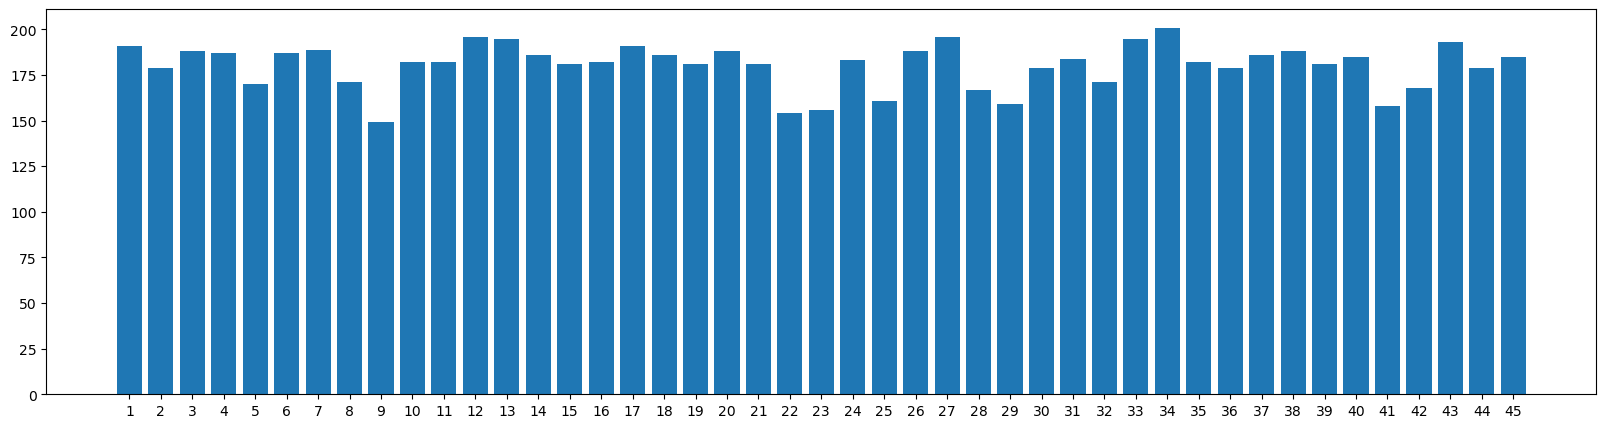

In [12]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize = (20, 5))
plt.bar(result['번호'],result['출현횟수'])
plt.xticks(range(1,46))
plt.show()

In [13]:
# 2. 몇주 안나온지
total = []
for i in range(len(df)):
    row = df.iloc[i].values
    total.append(row)

In [19]:
box=[]
for n in range(1, 46):
    count = 0
    for i in total[::-1]:
        if n not in i:
            count += 1
        else:
            break
    box.append([n,count])
box.sort(key = lambda x:x[-1])

text = f"{len(df)}회 기준 번호별 미출기간\n\n"

for i in box:
    text += f"{i[0]}번 : {i[1]}주 연속 미출현\n"

f = open("번호별 미출기간.txt", 'wt')
f.write(text)
f.close()

In [24]:
total

[array([10, 23, 29, 33, 37, 40, 16], dtype=int64),
 array([ 9, 13, 21, 25, 32, 42,  2], dtype=int64),
 array([11, 16, 19, 21, 27, 31, 30], dtype=int64),
 array([14, 27, 30, 31, 40, 42,  2], dtype=int64),
 array([16, 24, 29, 40, 41, 42,  3], dtype=int64),
 array([14, 15, 26, 27, 40, 42, 34], dtype=int64),
 array([ 2,  9, 16, 25, 26, 40, 42], dtype=int64),
 array([ 8, 19, 25, 34, 37, 39,  9], dtype=int64),
 array([ 2,  4, 16, 17, 36, 39, 14], dtype=int64),
 array([ 9, 25, 30, 33, 41, 44,  6], dtype=int64),
 array([ 1,  7, 36, 37, 41, 42, 14], dtype=int64),
 array([ 2, 11, 21, 25, 39, 45, 44], dtype=int64),
 array([22, 23, 25, 37, 38, 42, 26], dtype=int64),
 array([ 2,  6, 12, 31, 33, 40, 15], dtype=int64),
 array([ 3,  4, 16, 30, 31, 37, 13], dtype=int64),
 array([ 6,  7, 24, 37, 38, 40, 33], dtype=int64),
 array([ 3,  4,  9, 17, 32, 37,  1], dtype=int64),
 array([ 3, 12, 13, 19, 32, 35, 29], dtype=int64),
 array([ 6, 30, 38, 39, 40, 43, 26], dtype=int64),
 array([10, 14, 18, 20, 23, 30,

In [22]:
# 한번도 나오지 않았던 5등 조합
box = []
for n1 in range(1,46):
    for n2 in range(n1+1,46):
        for n3 in range(n2+1, 46):
            count = 0
            for i in total:
                if n1 in i[:6] and n2 in i[:6] and n3 in i[:6]:
                    break                    # 나온 적이 한번이라도 있다.
                else:
                    count += 1
            if count == len(total):
                box.append([n1,n2,n3])

In [25]:
len(box)

2681

In [28]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

In [68]:
#왠만한 표들은 table
import warnings
warnings.filterwarnings("ignore")

def make_table(html):
    table = html.find("table", class_ = "type_2") # 현재 table 객체 : 뷰리풀 숲
    table = pd.read_html(str(table))[0] #리스트 안에 df가 들어있는거임
    del table['N']
    del table['토론실']
    table = table.dropna(subset='종목명')
    return table

In [69]:
kospi_page = html.find('td', class_ = 'pgRR').find("a")['href'].split("=")[2] #td, pgrr이라는 클래스 안에 a, href에 마지막 페이지에 대한 정보있음
kospi_page

'47'

In [70]:
import random
random.random()

0.05412816742685633

In [71]:
from tqdm import tqdm

table_t=[]
i=1
while i <= int(kospi_page):
    url = requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={i}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    table_t.append(table)
    time.sleep(1 + random.random())
    i=i+1
table_t[0]

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
1,삼성전자,57600.0,상승 300,+0.52%,100.0,3438595.0,5969783.0,50.03,6403270.0,11.64,9.03
2,SK하이닉스,199700.0,"하락 5,300",-2.59%,5000.0,1453821.0,728002.0,55.95,1404404.0,13.94,-15.61
3,LG에너지솔루션,377500.0,"하락 8,000",-2.08%,500.0,883350.0,234000.0,4.54,64569.0,-243.55,6.36
4,삼성바이오로직스,1198000.0,"상승 47,000",+4.08%,2500.0,852665.0,71174.0,13.54,71143.0,81.01,9.12
5,현대차,203000.0,"하락 4,000",-1.93%,5000.0,425115.0,209416.0,37.41,239252.0,4.44,13.68
9,삼성전자우,48150.0,상승 150,+0.31%,100.0,396220.0,822887.0,73.79,391856.0,9.73,NaN
10,셀트리온,177400.0,하락 600,-0.34%,1000.0,379828.0,214108.0,22.48,113998.0,199.10,5.07
11,기아,93800.0,"하락 1,100",-1.16%,5000.0,373017.0,397673.0,39.40,354077.0,3.90,20.44
12,NAVER,227000.0,"하락 1,000",-0.44%,100.0,359652.0,158437.0,48.42,283954.0,21.89,4.41
13,KB금융,81600.0,하락 400,-0.49%,5000.0,321119.0,393528.0,75.62,294519.0,7.05,8.44


In [75]:
kospi = pd.concat(table_t, ignore_index=True)
kospi['소속'] = 'KOSPI'
kospi.to_excel("kospi.xlsx", index = False)
kospi

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,삼성전자,57600.0,상승 300,+0.52%,100.0,3438595.0,5969783.0,50.03,6403270.0,11.64,9.03,KOSPI
1,SK하이닉스,199700.0,"하락 5,300",-2.59%,5000.0,1453821.0,728002.0,55.95,1404404.0,13.94,-15.61,KOSPI
2,LG에너지솔루션,377500.0,"하락 8,000",-2.08%,500.0,883350.0,234000.0,4.54,64569.0,-243.55,6.36,KOSPI
3,삼성바이오로직스,1198000.0,"상승 47,000",+4.08%,2500.0,852665.0,71174.0,13.54,71143.0,81.01,9.12,KOSPI
4,현대차,203000.0,"하락 4,000",-1.93%,5000.0,425115.0,209416.0,37.41,239252.0,4.44,13.68,KOSPI
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,TIGER 200 산업재,8275.0,하락 5,-0.06%,0.0,20.0,240.0,0.00,10785.0,NaN,NaN,KOSPI
2306,PLUS 코스닥150선물인버스,5465.0,상승 20,+0.37%,0.0,19.0,350.0,0.00,10368.0,NaN,NaN,KOSPI
2307,HANARO 미국애그테크,11695.0,상승 5,+0.04%,0.0,18.0,150.0,0.00,501.0,NaN,NaN,KOSPI
2308,HANARO 글로벌백신치료제MSCI,11475.0,하락 325,-2.75%,0.0,17.0,150.0,0.00,265.0,NaN,NaN,KOSPI


In [77]:
#퀴즈 : 코스닥까지 모두 가져오셔서 코스피 코스닥을 합친 하나의 데이터 프레임
# per이 0보다 크고, 10보다 작은 행만 추출해서 저평가 종목 발굴하기
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1")
html = BeautifulSoup(url.text)
kosda_page = html.find('td', class_ = 'pgRR').find("a")['href'].split("=")[2] #td, pgrr이라는 클래스 안에 a, href에 마지막 페이지에 대한 정보있음
kosda_page

'36'

In [149]:
from tqdm import tqdm

table_k=[]
for i in tqdm(range(1, int(kosda_page)+1)):
    url = requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={i}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    table_k.append(table)
    time.sleep(1 + random.random())

  6%|████▌                                                                              | 2/36 [00:05<01:38,  2.90s/it]


KeyboardInterrupt: 

In [98]:
kosda = pd.concat(table_k, ignore_index=True)
kosda['소속'] = 'KOSDAQ'
kosda

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,알테오젠,393000.0,"상승 10,000",+2.61%,500.0,209543.0,53319.0,15.82,198989.0,-7145.45,-2.27,KOSDAQ
1,에코프로비엠,135400.0,"하락 5,400",-3.84%,500.0,132423.0,97801.0,10.67,391816.0,-60.94,-0.64,KOSDAQ
2,HLB,88400.0,상승 400,+0.45%,500.0,116146.0,131387.0,22.57,663679.0,-62.08,-32.55,KOSDAQ
3,에코프로,66400.0,"하락 2,200",-3.21%,100.0,88404.0,133138.0,20.02,601265.0,-48.64,3.43,KOSDAQ
4,레인보우로보틱스,390500.0,상승 500,+0.13%,500.0,75756.0,19400.0,8.28,189194.0,-370.14,-0.93,KOSDAQ
...,...,...,...,...,...,...,...,...,...,...,...,...
1786,투비소프트,632.0,상승 2,+0.32%,500.0,63.0,9900.0,2.26,426655.0,-0.20,-41.73,KOSDAQ
1787,셀리버리,152.0,"하락 6,528",-97.72%,500.0,57.0,37183.0,2.30,16946754.0,-0.92,472.60,KOSDAQ
1788,CNH,109.0,보합0,0.00%,2500.0,41.0,37200.0,6.07,0.0,-0.04,-18.80,KOSDAQ
1789,소프트센우,7050.0,상승 140,+2.03%,200.0,25.0,357.0,0.02,107.0,-110.16,NaN,KOSDAQ


In [99]:
ko_finance = pd.concat([kospi, kosda],axis = 0, ignore_index=True)
ko_finance[(ko_finance['PER']>0) & (ko_finance['PER']<10)]

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
4,현대차,203000.0,"하락 4,000",-1.93%,5000.0,425115.0,209416.0,37.41,239252.0,4.44,13.68,KOSPI
5,삼성전자우,48150.0,상승 150,+0.31%,100.0,396220.0,822887.0,73.79,391856.0,9.73,NaN,KOSPI
7,기아,93800.0,"하락 1,100",-1.16%,5000.0,373017.0,397673.0,39.40,354077.0,3.90,20.44,KOSPI
9,KB금융,81600.0,하락 400,-0.49%,5000.0,321119.0,393528.0,75.62,294519.0,7.05,8.44,KOSPI
12,현대모비스,256500.0,보합0,0.00%,5000.0,238532.0,92995.0,41.68,41903.0,6.99,8.73,KOSPI
...,...,...,...,...,...,...,...,...,...,...,...,...
3942,케이피티유,3495.0,하락 20,-0.57%,500.0,200.0,5726.0,0.28,702.0,9.55,6.55,KOSDAQ
3949,다산솔루에타,1108.0,하락 1,-0.09%,500.0,199.0,17950.0,0.54,4546.0,0.64,55.28,KOSDAQ
3973,디모아,3550.0,하락 5,-0.14%,500.0,175.0,4942.0,1.03,1466.0,3.08,-4.88,KOSDAQ
3979,씨엑스아이,57.0,상승 1,+1.79%,0.0,171.0,300578.0,0.00,605387.0,0.55,6.57,KOSDAQ


In [122]:
dic = {"User-Agent" : "mozilla/5.0 (macintosh; intel mac os x 10_15_7)"} #딕셔너리를 파이썬 -> 맥오에스로 변경

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930", headers = dic) # headers = 딕셔리리
html = BeautifulSoup(url.text)

In [125]:
table = html.find("table") # 현재 table 객체 : 뷰리풀 숲
pd.read_html(str(table))[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.02.25,57400.0,상승 100,56600.0,57800.0,56500.0,8307525.0
2,2025.02.24,57300.0,하락 900,57300.0,57700.0,57200.0,14138471.0
3,2025.02.21,58200.0,하락 200,58400.0,58500.0,57100.0,22198428.0
4,2025.02.20,58400.0,하락 300,59100.0,59100.0,58100.0,21589059.0
5,2025.02.19,58700.0,"상승 1,800",57400.0,58900.0,57300.0,25395151.0
9,2025.02.18,56900.0,상승 900,56200.0,57200.0,55900.0,22131007.0
10,2025.02.17,56000.0,보합0,56100.0,56500.0,55700.0,11916027.0
11,2025.02.14,56000.0,상승 200,56000.0,57300.0,56000.0,23979779.0
12,2025.02.13,55800.0,보합0,56100.0,56400.0,55600.0,22448377.0
13,2025.02.12,55800.0,상승 100,55100.0,55900.0,54500.0,26428596.0


In [126]:
url = requests.get("https://finance.naver.com/sise/dividend_list.naver?&page=1")
html = BeautifulSoup(url.text)

In [132]:
table = html.find('table', class_ = 'type_1 tb_ty')
table = pd.read_html(str(table), header = 1)[0] # header = 1번째 행
table = table.dropna(subset = "종목명")
table.info() # 2년전, 3년전 object

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 68
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   종목명       50 non-null     object 
 1   현재가       50 non-null     float64
 2   기준월       50 non-null     float64
 3   배당금       50 non-null     float64
 4   수익률 (%)   50 non-null     float64
 5   배당성향 (%)  50 non-null     object 
 6   ROE (%)   50 non-null     object 
 7   PER (배)   50 non-null     object 
 8   PBR (배)   50 non-null     object 
 9   1년전       50 non-null     float64
 10  2년전       50 non-null     object 
 11  3년전       50 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.1+ KB


In [148]:
# 전체 페이지 불러와서 데이터 전처리
from tqdm import tqdm
total=[]
for i in tqdm(range(1, 18)):
    url = requests.get(f"https://finance.naver.com/sise/dividend_list.naver?&page={i}")
    html = BeautifulSoup(url.text)
    table = html.find('table', class_ = 'type_1 tb_ty')
    table = pd.read_html(str(table), header = 1)[0] # header = 1번째 행
    table = table.dropna(subset = "종목명")
    total.append(table)
    time.sleep(1 + random.random())
total

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:31<00:00,  1.86s/it]


[            종목명       현재가    기준월      배당금  수익률 (%)  배당성향 (%) ROE (%)  PER (배)  \
 1       이지스밸류리츠    4375.0  24.12    823.0    18.81  -1361.40   -0.57  -116.13   
 2      제이알글로벌리츠    2505.0  24.06    390.0    15.57    158.83    2.82    32.42   
 3         레드캡투어   14090.0  25.03   2150.0    15.26    177.53       -        -   
 4       NH프라임리츠    4540.0  24.11    658.0    14.49    137.10    6.38    11.26   
 5        신한알파리츠    6050.0  24.09    806.0    13.32    547.91    0.61   183.31   
 8         이크레더블   13290.0  24.12   1590.0    11.96    148.28   27.34    12.07   
 9      미래에셋맵스리츠    2510.0  24.11    284.0    11.31    215.00    1.60    42.27   
 10         서호전기   22100.0  24.12   2500.0    11.31         -       -        -   
 11     HB인베스트먼트    1846.0  24.12    200.0    10.83     92.42       -        -   
 12       KB스타리츠    3660.0  24.07    376.0    10.27    -59.97   -7.71   -14.21   
 15         크레버스   14980.0  25.04   1500.0    10.01         -       -        -   
 16       NH올원리츠

In [189]:
import numpy as np
bd = pd.concat(total, ignore_index=True)
bd['3년전'] = bd['3년전'].str.replace("-","0").astype("float32")
bd['2년전'] = bd['2년전'].str.replace("-","0").astype("float32")
print(bd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   종목명       845 non-null    object 
 1   현재가       845 non-null    float64
 2   기준월       845 non-null    object 
 3   배당금       845 non-null    float64
 4   수익률 (%)   845 non-null    float64
 5   배당성향 (%)  845 non-null    object 
 6   ROE (%)   845 non-null    object 
 7   PER (배)   845 non-null    object 
 8   PBR (배)   845 non-null    object 
 9   1년전       845 non-null    float64
 10  2년전       400 non-null    float32
 11  3년전       445 non-null    float32
dtypes: float32(2), float64(4), object(6)
memory usage: 72.7+ KB
None


In [182]:
A = bd['3년전'] < bd['2년전']
B = bd['2년전'] < bd['1년전']
C = bd['1년전'] < bd['배당금']
bd2 = bd[A&B&C]

In [188]:
from datetime import datetime

today = str(datetime.today().date())

text = f"{today}기준 3년 연속 배당금이 상승한 기업 리스트 \n\n"

for i in range(len(bd2)):
    row = bd2.iloc[i]
    name = row['종목명']
    a,b,c,d = row['배당금'], row['1년전'], row['2년전'], row['3년전']
    text += f'{name} : {int(d):,}원 → {int(c):,}원 → {int(b):,}원 → {int(a):,}원\n'
f = open("3년 연속 배당금 상승 기업.txt", 'wt')
f.write(text)
f.close()